# 03_forecasting_time_series — 01_data_preparation


# 03_forecasting_time_series — 01_data_preparation


# 03_forecasting_time_series — 01_data_preparation


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

import os
os.makedirs("../images", exist_ok=True)



In [4]:
# If your file is in Colab session:
from google.colab import files
uploaded = files.upload()




Saving online_retail_raw.xlsx to online_retail_raw.xlsx


In [5]:
df = pd.read_excel("online_retail_raw.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#Basic cleaning + Revenue

In [6]:
df = df.dropna(subset=["InvoiceDate"])
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

df = df.dropna(subset=["CustomerID"])
df = df[df["Quantity"] > 0]
df = df[df["UnitPrice"] > 0]

df["Revenue"] = df["Quantity"] * df["UnitPrice"]
df[["InvoiceDate","CustomerID","Revenue"]].head()


,InvoiceDate,CustomerID,Revenue
0,2010-12-01 08:26:00,17850.0,15.30
1,2010-12-01 08:26:00,17850.0,20.34
2,2010-12-01 08:26:00,17850.0,22.00
3,2010-12-01 08:26:00,17850.0,20.34
4,2010-12-01 08:26:00,17850.0,20.34


#Create monthly time series

In [7]:
monthly_revenue = (
    df.set_index("InvoiceDate")["Revenue"]
      .resample("ME")
      .sum()
      .reset_index()
)

monthly_revenue.head()


,InvoiceDate,Revenue
0,2010-12-31,572713.890
1,2011-01-31,569445.040
2,2011-02-28,447137.350
3,2011-03-31,595500.760
4,2011-04-30,469200.361


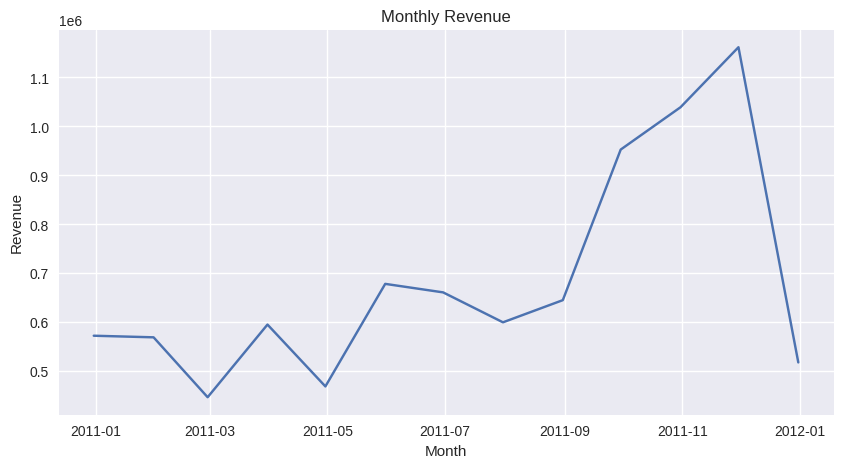

In [8]:
plt.figure(figsize=(10,5))
plt.plot(monthly_revenue["InvoiceDate"], monthly_revenue["Revenue"])
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()
